# Early Data Analysis of Textual Data

In [56]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [114]:
## read in our data 
df = pd.read_csv("datasets/training_set_rel3.tsv", delimiter = "\t")


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
## Stop words gets rid of all of unecessary words in our essays 
# We use ignore for decode_error because our data is in a different byte format then CountVectorizer
# is used to 
vectorizer = CountVectorizer(stop_words="english", min_df=4, decode_error = "ignore")
corpus = df['essay'].values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
## Domain1 score is the resolved scores between the two graders in case of disagreement 
y = df['domain1_score'].values

# Compare Size of Essay with Score 

In [82]:
## note that this is the length of essays NOT including the stop words.
# This assumes that the number of stop words doesn't relate much to the content or grading of the essay 
lengths_of_essays = [sum(i) for i in x]
lengths_of_essays = np.array(lengths_of_essays)

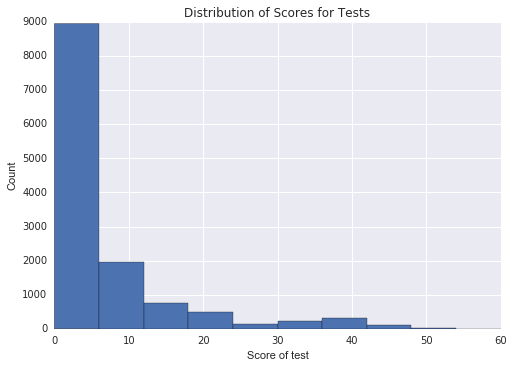

In [90]:
## Let's take a look at the distribution of the scores of tests
plt.hist(y)
plt.title("Distribution of Scores for Tests")
plt.xlabel("Score of test")
plt.ylabel("Count")

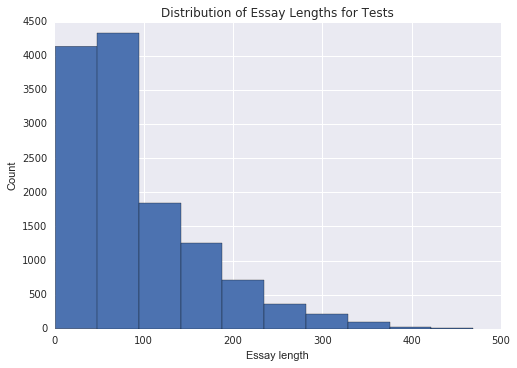

In [89]:
plt.hist(lengths_of_essays)
plt.title("Distribution of Essay Lengths for Tests")
plt.xlabel("Essay length")
plt.ylabel("Count")

## So, it looks like the scores of our tests seem to range very widely
This might be because of the different essay tests. Let's explore this a bit more.

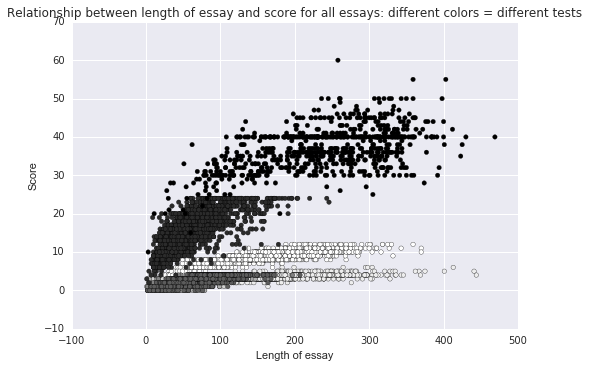

In [143]:
len(lengths_of_essays)

plt.scatter(lengths_of_essays, y, c = df["essay_set"])

plt.title("Relationship between length of essay and score for all essays: different colors = different tests")
plt.xlabel("Length of essay")
plt.ylabel("Score")



# We are working with different scoring scales
To understand the relationship, we'll break down each of the essays into its own graph 

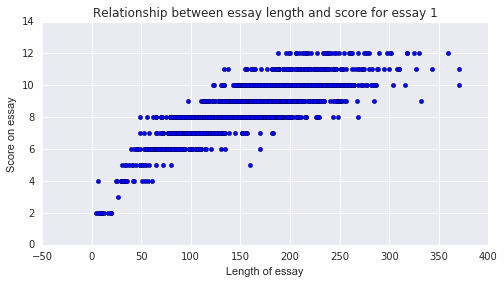

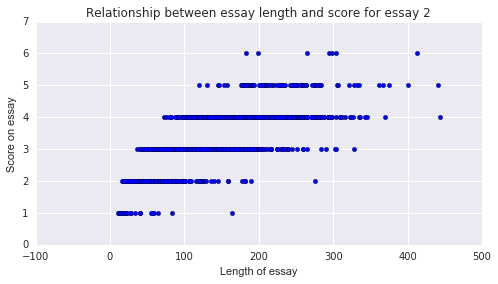

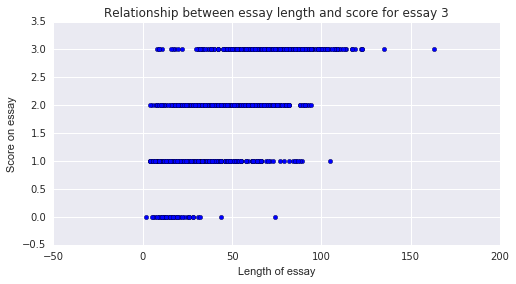

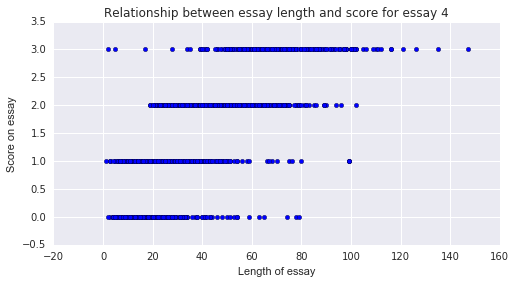

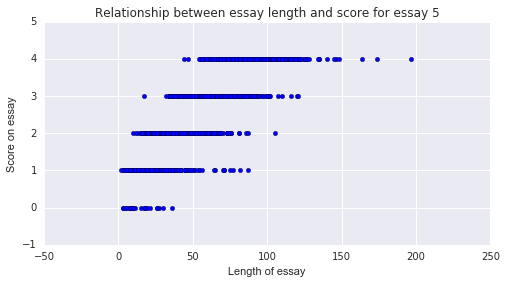

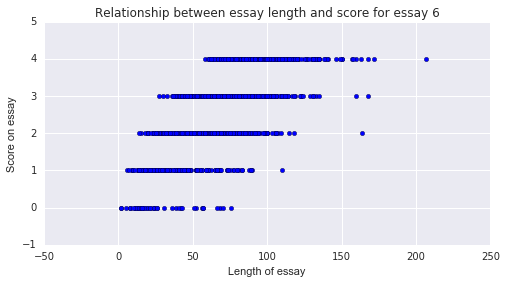

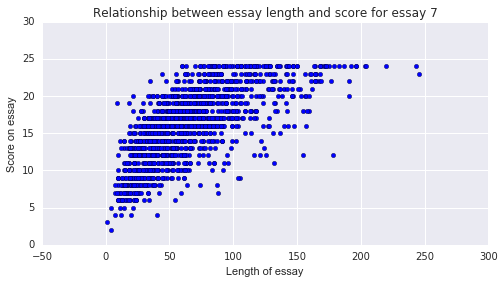

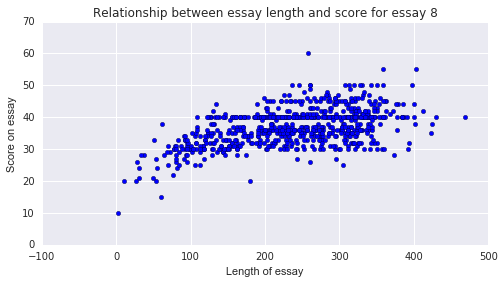

In [113]:
essay_set = df["essay_set"].unique()

for i in essay_set: 
    fig, ax = plt.subplots(1, 1, figsize = (8, 4))
    
    temp_y = y[np.where(df["essay_set"] == essay_set[i - 1])]
    temp_length = lengths_of_essays[np.where(df["essay_set"] == essay_set[i - 1])]

    ax.scatter(temp_length, temp_y)
    
    title = "Relationship between essay length and score for essay " +  str(i)
    ax.set_title(title)
    ax.set_xlabel("Length of essay")
    ax.set_ylabel("Score on essay")



## It appears that there is a positive relationship between scores and number of words for all of the essays
Though that relationship may be stronger or weaker depending on the essay type

# Number of Unique Words vs. Score 

In [126]:
# Counts the number of unique words 
num_unique_words  = np.array([ np.count_nonzero(i) for i in x])


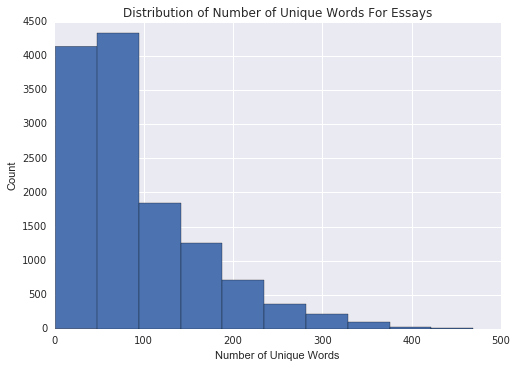

In [131]:
plt.hist(lengths_of_essays)
plt.title("Distribution of Number of Unique Words For Essays")
plt.xlabel("Number of Unique Words")
plt.ylabel("Count")

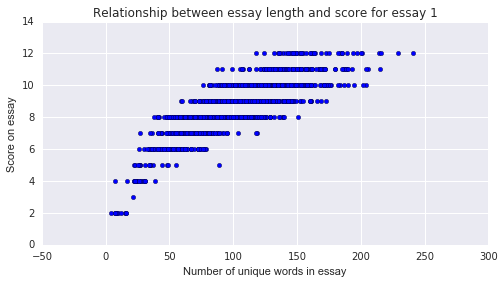

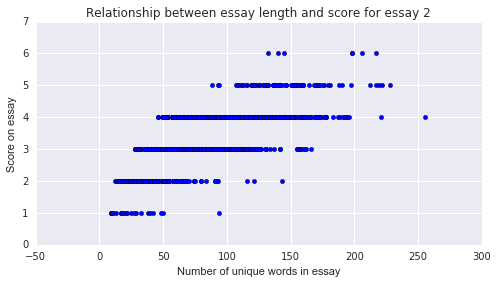

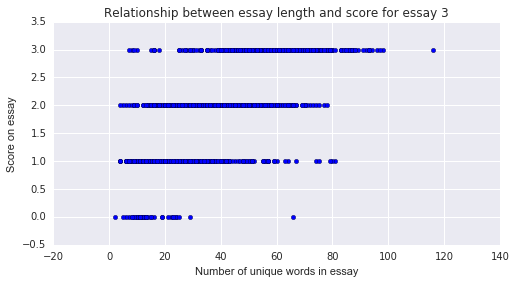

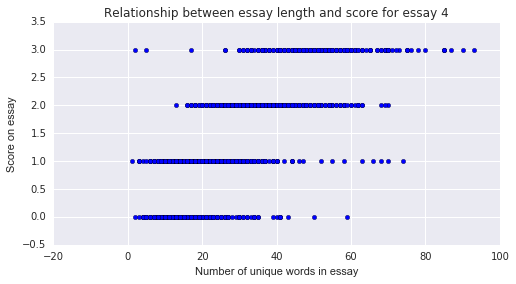

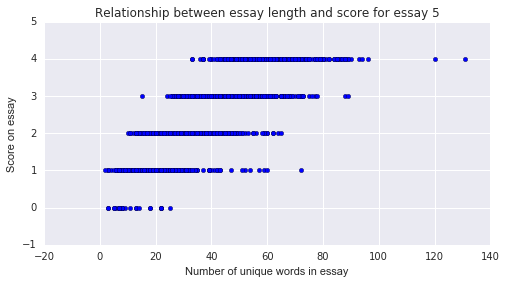

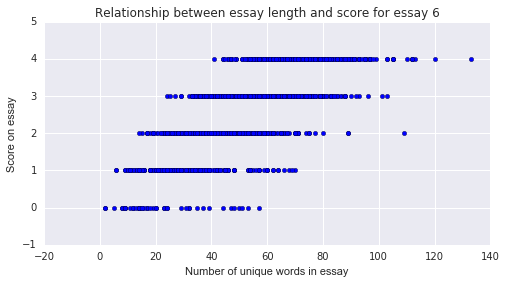

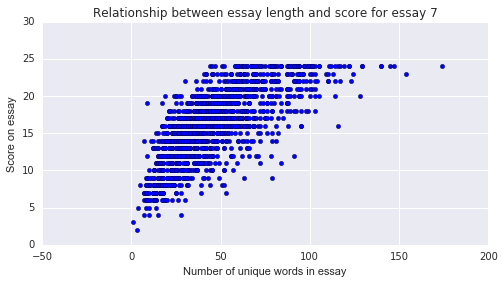

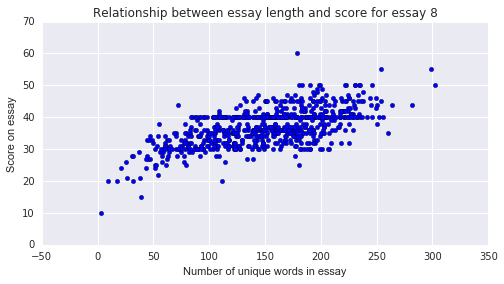

In [127]:
for i in essay_set: 
    fig, ax = plt.subplots(1, 1, figsize = (8, 4))
    
    temp_y = y[np.where(df["essay_set"] == essay_set[i - 1])]
    temp_unique_words = num_unique_words[np.where(df["essay_set"] == essay_set[i - 1])]

    ax.scatter(temp_unique_words, temp_y)
    
    title = "Relationship between Number of Unique Words and score for essay " +  str(i)
    ax.set_title(title)
    ax.set_xlabel("Number of unique words in essay")
    ax.set_ylabel("Score on essay")

## Correlation between expert judgement 
Let's explore how correlated our experts choices are. We'll do this by using rater1_domain1 and rater2_domain2 


In [142]:
np.corrcoef(df["rater1_domain1"], df["rater2_domain1"])

array([[ 1.        ,  0.96932615],
       [ 0.96932615,  1.        ]])

# Our judges are very strongly correlated, indicating strong interrater reliability
Overall, it looks like our scores have a pearson correlation of roughly .97. This indicates that we have a very high correlation and that we can be assured that the scorers have a high amount of interrater reliability. 